# Plot Debugging

I am noticing some wierd things in the plots, and I am going to attempt to fix them on this branch:
- #41, it seems like the ball and the players are on different time scales?
- #14, the event only shows up for one frame

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import os

# Matt written files
from src.utils import *
from src.plotting import Baseball_Field
from src.game import Game

In [2]:
# pandas options
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # default='warn'

Example plays are 
- 326
- 18

Distance between ball and player is large on average, should maybe clean up 12.199183415462679


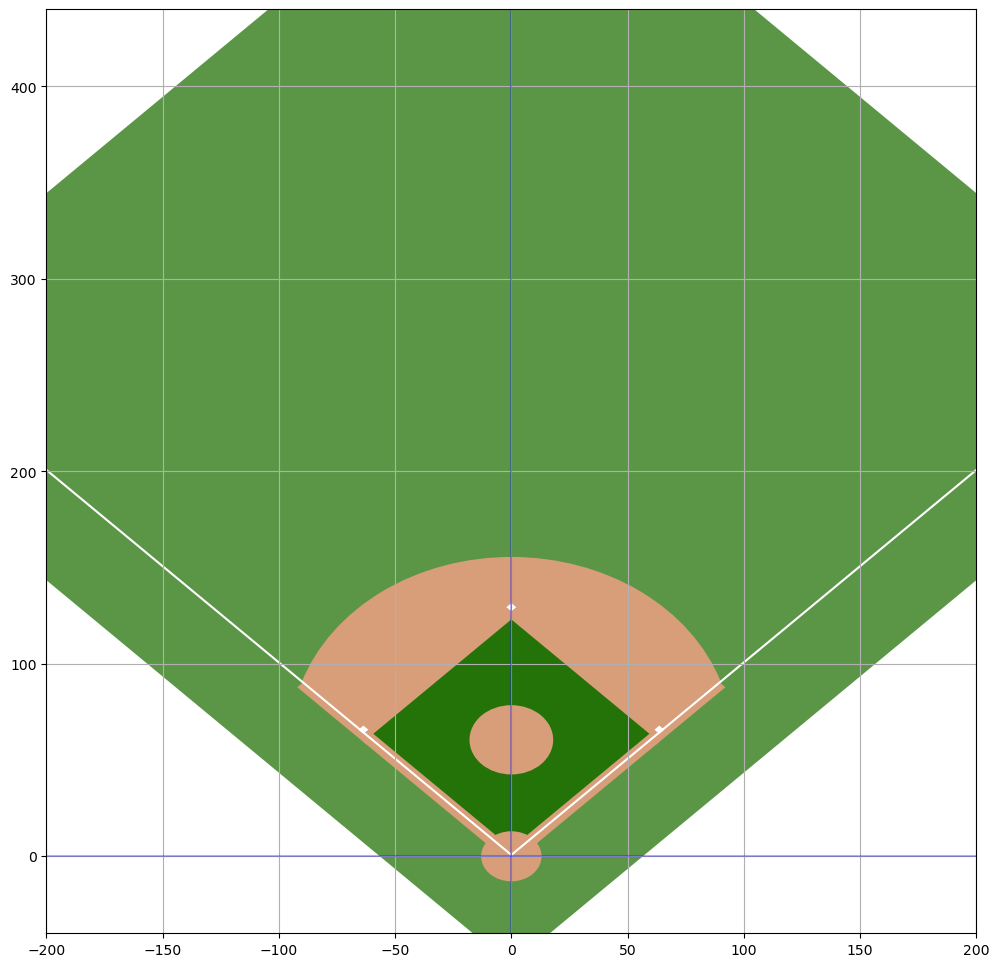

In [3]:
bf_1903_01 = Baseball_Field("1903_01_TeamNE_TeamA2")

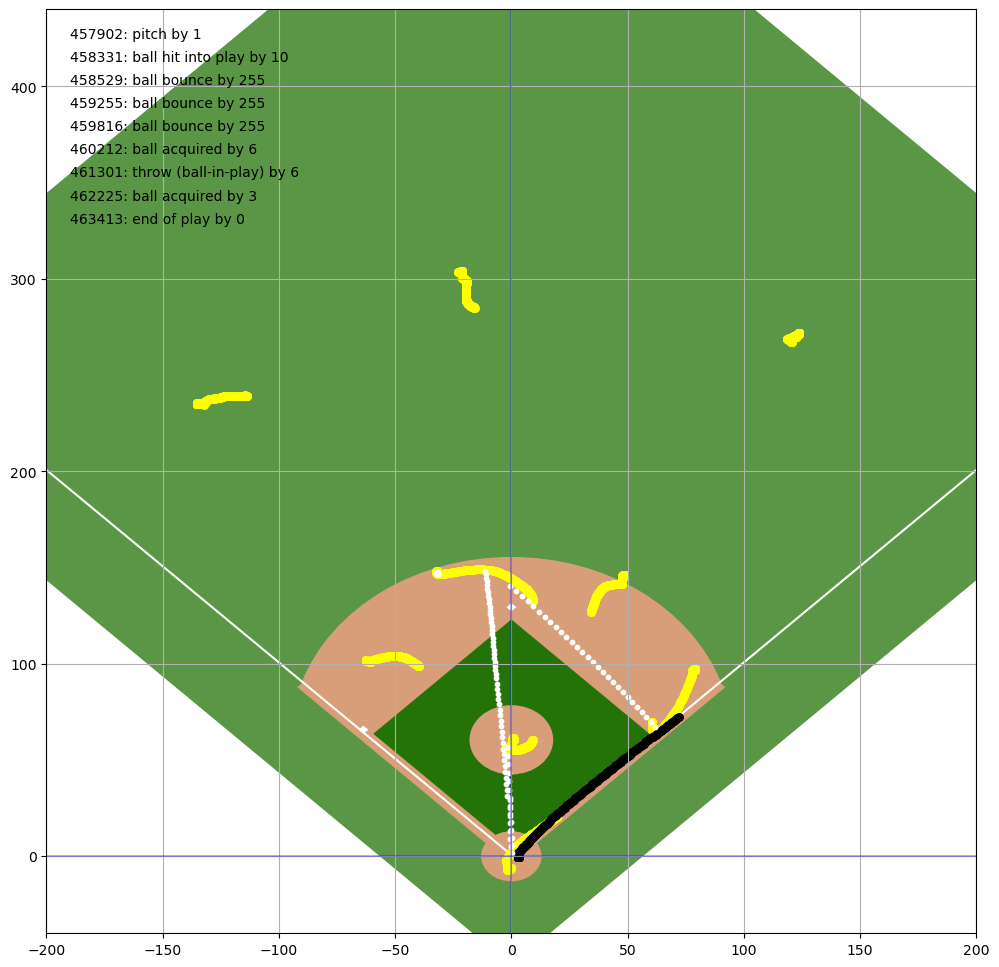

In [4]:
bf_1903_01.clear_plot()

play_id = 18

bf_1903_01.plot_all_components(play_id=play_id)
bf_1903_01.fig

# bf_1903_01.create_gif(play_id=play_id, tag="--debugging")

In [45]:
game_events_1903_01 = bf_1903_01.game_obj.game_events_df.copy()
game_info_1903_01 = bf_1903_01.game_obj.game_info_df.copy()
player_pos_1903_01 = bf_1903_01.game_obj.new_player_pos.copy()
ball_pos_1903_01 = bf_1903_01.game_obj.ball_pos_df.copy()



game_events_1903_01.head(2)

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event,next_event_code,next_event,next_event_ts,prev_event_code,prev_event,prev_event_ts,xy_throw_angle,elevation_throw_angle,throw_velo
1,1903_01_TeamNE_TeamA2,1,1,1,19199,1,1,pitch,2.0,ball acquired,19661.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1903_01_TeamNE_TeamA2,1,1,1,19661,2,2,ball acquired,5.0,end of play,19661.0,1.0,pitch,19199.0,NaN,NaN,NaN


In [6]:
game_events_1903_01[game_events_1903_01["play_id"] == 326]

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event,next_event_code,next_event,next_event_ts,prev_event_code,prev_event,prev_event_ts,xy_throw_angle,elevation_throw_angle,throw_velo
1251,1903_01_TeamNE_TeamA2,326,84,327,10929703,1,1,pitch,4.0,ball hit into play,10930099.0,NaN,NaN,NaN,NaN,NaN,NaN
1252,1903_01_TeamNE_TeamA2,326,84,327,10930099,10,4,ball hit into play,16.0,ball bounce,10930363.0,1.0,pitch,10929703.0,NaN,NaN,NaN
1253,1903_01_TeamNE_TeamA2,326,84,327,10930363,255,16,ball bounce,16.0,ball bounce,10930990.0,4.0,ball hit into play,10930099.0,NaN,NaN,NaN
1254,1903_01_TeamNE_TeamA2,326,84,327,10930990,255,16,ball bounce,2.0,ball acquired,10931419.0,16.0,ball bounce,10930363.0,NaN,NaN,NaN
1255,1903_01_TeamNE_TeamA2,326,84,327,10931419,5,2,ball acquired,3.0,throw (ball-in-play),10932706.0,16.0,ball bounce,10930990.0,NaN,NaN,NaN
1256,1903_01_TeamNE_TeamA2,326,84,327,10932706,5,3,throw (ball-in-play),2.0,ball acquired,10933696.0,2.0,ball acquired,10931419.0,2.961444,5.049541,74.759539
1257,1903_01_TeamNE_TeamA2,326,84,327,10933696,3,2,ball acquired,5.0,end of play,10934884.0,3.0,throw (ball-in-play),10932706.0,NaN,NaN,NaN
1258,1903_01_TeamNE_TeamA2,326,84,327,10934884,0,5,end of play,NaN,NaN,NaN,2.0,ball acquired,10933696.0,NaN,NaN,NaN


In [7]:
ball_pos_1903_01.loc[(ball_pos_1903_01["play_id"] == 326)
                       , :]

,game_str,play_id,timestamp,ball_position_x,ball_position_y,ball_position_z,smoothed_ball_position_x,smoothed_ball_position_y,smoothed_ball_position_z
14175,1903_01_TeamNE_TeamA2,326,10929703,2.694879,53.2071,5.72328,NaN,NaN,NaN
14176,1903_01_TeamNE_TeamA2,326,10929736,2.370363,48.6996,5.50053,2.376846,48.709200,5.493380
14177,1903_01_TeamNE_TeamA2,326,10929769,2.065296,44.2209,5.25633,2.227556,46.474650,5.367690
14178,1903_01_TeamNE_TeamA2,326,10929802,1.779684,39.7710,4.99062,1.932216,42.010350,5.112735
14179,1903_01_TeamNE_TeamA2,326,10929835,1.513521,35.3499,4.70346,1.656328,37.574925,4.836308
...,...,...,...,...,...,...,...,...,...
14254,1903_01_TeamNE_TeamA2,326,10933564,49.362600,71.1342,5.61570,47.812650,71.612175,5.771228
14255,1903_01_TeamNE_TeamA2,326,10933597,52.424700,70.1736,5.24322,50.884275,70.652850,5.414100
14256,1903_01_TeamNE_TeamA2,326,10933630,55.468200,69.2112,4.84002,53.937000,69.691425,5.026268
14257,1903_01_TeamNE_TeamA2,326,10933663,58.492500,68.2467,4.40613,56.970825,68.727825,4.607715


In [8]:
player_pos_1903_01.loc[(player_pos_1903_01["play_id"] == 18) &
                       (player_pos_1903_01["player_position"] == 6), :]

,game_str,play_id,timestamp,player_position,field_x,field_y,player_position_desc,lag_1_timestamp,lag_1_field_x,lag_1_field_y,diff_timestamp,diff_field_x,diff_field_y,velo_x,velo_y
27324,1903_01_TeamNE_TeamA2,18,457902,6,-31.8198,148.4139,SS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27325,1903_01_TeamNE_TeamA2,18,457935,6,-31.8234,148.3923,SS,457902.0,-31.8198,148.4139,33.0,-0.0036,-0.0216,-0.109091,-0.654545
27326,1903_01_TeamNE_TeamA2,18,457968,6,-31.8270,148.3710,SS,457935.0,-31.8234,148.3923,33.0,-0.0036,-0.0213,-0.109091,-0.645455
27327,1903_01_TeamNE_TeamA2,18,458001,6,-31.8312,148.3494,SS,457968.0,-31.8270,148.3710,33.0,-0.0042,-0.0216,-0.127273,-0.654545
27328,1903_01_TeamNE_TeamA2,18,458034,6,-31.8360,148.3278,SS,458001.0,-31.8312,148.3494,33.0,-0.0048,-0.0216,-0.145455,-0.654545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27578,1903_01_TeamNE_TeamA2,18,466284,6,9.2781,133.2093,SS,466251.0,9.2379,133.3806,33.0,0.0402,-0.1713,1.218182,-5.190909
27579,1903_01_TeamNE_TeamA2,18,466317,6,9.3174,133.0383,SS,466284.0,9.2781,133.2093,33.0,0.0393,-0.1710,1.190909,-5.181818
27580,1903_01_TeamNE_TeamA2,18,466350,6,9.3564,132.8673,SS,466317.0,9.3174,133.0383,33.0,0.0390,-0.1710,1.181818,-5.181818
27581,1903_01_TeamNE_TeamA2,18,466383,6,9.3951,132.6966,SS,466350.0,9.3564,132.8673,33.0,0.0387,-0.1707,1.172727,-5.172727


In [9]:
game_events_1903_01.loc[(game_events_1903_01["play_id"] == 326) &
                        (game_events_1903_01["event"].isin(["ball acquired", "throw (ball-in-play)"])), ]

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event,next_event_code,next_event,next_event_ts,prev_event_code,prev_event,prev_event_ts,xy_throw_angle,elevation_throw_angle,throw_velo
1255,1903_01_TeamNE_TeamA2,326,84,327,10931419,5,2,ball acquired,3.0,throw (ball-in-play),10932706.0,16.0,ball bounce,10930990.0,NaN,NaN,NaN
1256,1903_01_TeamNE_TeamA2,326,84,327,10932706,5,3,throw (ball-in-play),2.0,ball acquired,10933696.0,2.0,ball acquired,10931419.0,2.961444,5.049541,74.759539
1257,1903_01_TeamNE_TeamA2,326,84,327,10933696,3,2,ball acquired,5.0,end of play,10934884.0,3.0,throw (ball-in-play),10932706.0,NaN,NaN,NaN


In [10]:
plt.close()

In [107]:
## stretch the ball pos to the player pos

# trust the ball pos at ball acquired

# trust which time scale? I think the ball probably
play_id = 326

ball_acq = game_events_1903_01.loc[
    (game_events_1903_01["play_id"] == play_id) &
    (game_events_1903_01["event"] == "ball acquired")
    , "timestamp"
].values[0]


this_play_ball = ball_pos_1903_01.loc[ball_pos_1903_01["play_id"] == play_id]
this_play_ball["this_play_ms"] = this_play_ball.timestamp - this_play_ball.timestamp.min()


first_ball_acq_x = ball_pos_1903_01.loc[ball_pos_1903_01["timestamp"] == ball_acq, "ball_position_x"]


this_play_players = player_pos_1903_01.loc[
    (player_pos_1903_01["play_id"] == play_id) &
    (player_pos_1903_01["player_position"] == 5)
    , :]

this_play_players["this_play_ms"] = this_play_players.timestamp - this_play_players.timestamp.min()


overlap_ms_players = this_play_players.loc[
    (abs(this_play_players["field_x"] - first_ball_acq_x.values[0]) < 1)
    , "this_play_ms"].values[0]


overlap_ms_ball = this_play_ball.loc[this_play_ball["timestamp"] == ball_acq, "this_play_ms"].values[0]


time_delta = overlap_ms_players - overlap_ms_ball

In [108]:
time_delta

3003

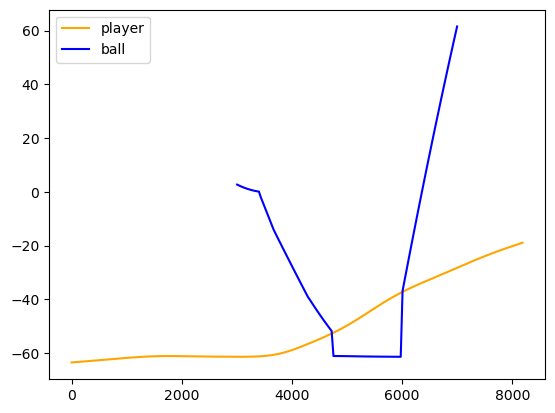

In [139]:
f, ax = plt.subplots()



ax.plot(this_play_players["this_play_ms"], this_play_players["field_x"], color = "orange", label="player") 
ax.plot(this_play_ball["this_play_ms"]+time_delta, this_play_ball["ball_position_x"], color = "blue", label="ball") 

ax.legend()

In [115]:
this_play_players.timestamp.min() - this_play_ball.timestamp.min()

0

### Do the above procedure for every play!

In [ ]:
def line_up_ball_and_players():
    pass

In [ ]:
# get the first ball acq in ever event

In [46]:
# Fill the timestamp for each play


##
this_play_players["this_play_ms"] = this_play_players.timestamp - this_play_players.timestamp.min()

#

this_play_ball["this_play_ts"] = np.nan
this_play_ball["adjusted_play_ts"] = np.nan

this_play_ball["this_play_ts"] = this_play_ball.timestamp - this_play_ball.timestamp.min()


In [73]:
# get the player and time that the ball was first acquired
ball_acq_event = game_events_1903_01.loc[
    game_events_1903_01["event"] == "ball acquired"
].groupby("play_id")[["player_position", "timestamp"]].first()


In [117]:
# get ball_position_x of the first ball acq for each play
first_ball_acq_pos = ball_pos_1903_01.merge(
    ball_acq_event, 
    how="inner", 
    on=["play_id", "timestamp"]
)[["play_id", "ball_position_x", "ball_position_y"]]

In [126]:
# get the player_pos for each player that first acquires the ball for each play

player_pos_first_acq = player_pos_1903_01.merge(
    ball_acq_event, 
    how="inner", 
    on=["play_id", "player_position"], 
    suffixes=["", "_ball_first_acq"]
)

In [141]:
# dist margin, how far we allow the play to be off
# 3 is roughly an arms length, could do better with limb data
margin = 3


# merge the ball pos when first acquired and player dfs
combined_first_acq = player_pos_first_acq.merge(first_ball_acq_pos, on="play_id", how="left")

# get the distance between the ball and player who acquired
combined_first_acq["delta_dist"] = np.sqrt(
    (combined_first_acq["field_x"] - combined_first_acq["ball_position_x"])**2 +\
    (combined_first_acq["field_y"] - combined_first_acq["ball_position_y"])**2                                    
)

# could totally do a more complex min here, e.g. with fill x and y
# I think the raw min won't work, so have a margin
# and pick the first time this happens
combined_first_acq = combined_first_acq[combined_first_acq["delta_dist"] < margin].groupby("play_id").first()

# compute the lags needed for each play to line up the ball with the player + 3 ft
ts_lag_df = (combined_first_acq["timestamp"] - combined_first_acq["timestamp_ball_first_acq"])

### verify that this works before adding this into Game

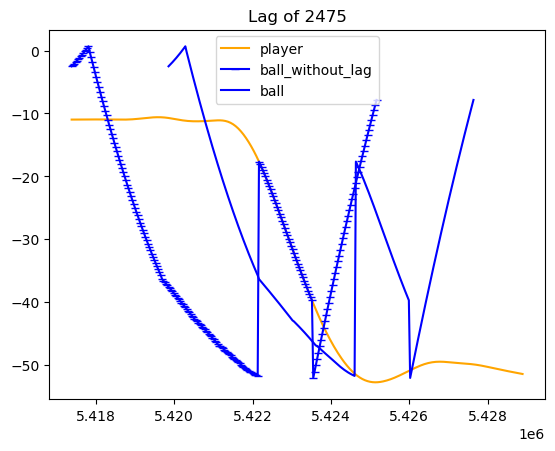

In [165]:
play_id = 162

this_play_ball = ball_pos_1903_01.loc[ball_pos_1903_01["play_id"] == play_id]

this_play_players = player_pos_1903_01.loc[
    (player_pos_1903_01["play_id"] == play_id) &
    (player_pos_1903_01["player_position"] == ball_acq_event.loc[play_id, "player_position"])
    , :]

f, ax = plt.subplots()

ax.plot(this_play_players["timestamp"], this_play_players["field_x"], color = "orange", label="player") 
ax.plot(this_play_ball["timestamp"], this_play_ball["ball_position_x"], marker="_", color = "blue", label="ball_without_lag") 


ax.plot(this_play_ball["timestamp"] + ts_lag_df[play_id], this_play_ball["ball_position_x"], color = "blue", label="ball") 

ax.set_title("Lag of {}".format(ts_lag_df[play_id]))

ax.legend()

### Things that need to happen to merge this with Game

- add the procedure I just made
- use that to reset the timestamps for ball
    - map the old ts to a variable called "old_ts"
- Recompute the ball preprocessing stuff, or just order it so it doesn't happed the first time?


Not as critical, but could be a helper:
- add a "this_play_ts" in player_pos and ball_pos

```python
# get the timestamps of the play where 0 is the start of the play
ball_pos_1903_01 = ball_pos_1903_01.merge(ball_pos_1903_01.groupby("play_id")["timestamp"].min(), on="play_id", suffixes=["", "_play_min"])
ball_pos_1903_01["this_play_ts"] = ball_pos_1903_01["timestamp"] - ball_pos_1903_01["timestamp_play_min"]
```



### I THINK IT IS JUST A CONSTANT FACTOR PER GAME?
- It seems like most games this is not a problem from looking at some gifs?

### Double check whether it is a constant factor per game by running this

In [7]:
bf_09 = Baseball_Field("1903_09_TeamNJ_TeamB")

Distance between ball and player is large on average, should maybe clean up 12.947763118481664


/Users/mattnicholson/Documents/RandomProjects/smt-data-challenge/src/game.py:815: RuntimeWarning: invalid value encountered in cast
  running_outs_seq[(running_index): (running_index + outs_seq.shape[0]), :] = outs_seq


In [12]:
game_events_09 = bf_09.game_obj.game_events_df.copy()
game_info_09 = bf_09.game_obj.game_info_df.copy()
player_pos_09 = bf_09.game_obj.new_player_pos.copy()
ball_pos_09 = bf_09.game_obj.ball_pos_df.copy()


In [18]:
game_events_09[game_events_09["event"] == "throw (ball-in-play)"].head(3)

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event,next_event_code,next_event,next_event_ts,prev_event_code,prev_event,prev_event_ts,xy_throw_angle,elevation_throw_angle,throw_velo
48,1903_09_TeamNJ_TeamB,15,3,16,344834,6,3,throw (ball-in-play),2.0,ball acquired,345784.0,2.0,ball acquired,343484.0,7.418955,2.233167,73.630919
80,1903_09_TeamNJ_TeamB,24,4,25,632534,7,3,throw (ball-in-play),2.0,ball acquired,634084.0,2.0,ball acquired,631434.0,2.915168,9.609680,62.241388
125,1903_09_TeamNJ_TeamB,38,6,39,990484,7,3,throw (ball-in-play),2.0,ball acquired,992134.0,2.0,ball acquired,988584.0,5.779574,12.114775,58.014101


In [29]:
bf_09.clear_plot()

play_id = 24

# bf_09.plot_all_components(play_id=play_id)
# bf_09.fig

# bf_09.create_gif(play_id=play_id, tag="--debugging, markers are off")

MovieWriter ffmpeg unavailable; using Pillow instead.


In [22]:
## stretch the ball pos to the player pos

# trust the ball pos at ball acquired

# trust which time scale? I think the ball probably
play_id = 15

ball_acq = game_events_09.loc[
    (game_events_09["play_id"] == play_id) &
    (game_events_09["event"] == "ball acquired")
    , "timestamp"
].values[0]


this_play_ball = ball_pos_09.loc[ball_pos_09["play_id"] == play_id]
this_play_ball["this_play_ms"] = this_play_ball.timestamp - this_play_ball.timestamp.min()


first_ball_acq_x = ball_pos_09.loc[ball_pos_09["timestamp"] == ball_acq, "ball_position_x"]


this_play_players = player_pos_09.loc[
    (player_pos_09["play_id"] == play_id) &
    (player_pos_09["player_position"] == 6)
    , :]

this_play_players["this_play_ms"] = this_play_players.timestamp - this_play_players.timestamp.min()


overlap_ms_players = this_play_players.loc[
    (abs(this_play_players["field_x"] - first_ball_acq_x.values[0]) < 1)
    , "this_play_ms"].values[0]


overlap_ms_ball = this_play_ball.loc[this_play_ball["timestamp"] == ball_acq, "this_play_ms"].values[0]


time_delta = overlap_ms_players - overlap_ms_ball

In [23]:
time_delta

3050

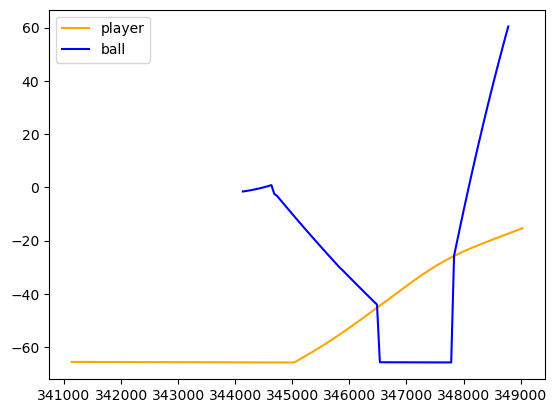

In [26]:
bf_09.clear_plot()
plt.close()

f, ax = plt.subplots()

play_id = 15

thirdbaseman_df = player_pos_09.loc[(player_pos_09["play_id"] == play_id) &
                       (player_pos_09["player_position"] == 6), :]


ball_df = ball_pos_09.loc[(ball_pos_09["play_id"] == play_id)
                       , :]

ax.plot(thirdbaseman_df["timestamp"], thirdbaseman_df["field_x"], color = "orange", label="player") 
ax.plot(ball_df["timestamp"]+3000, ball_df["ball_position_x"], color = "blue", label="ball") 
ax.legend()

f

### The one has a smaller dist Which game: 1900_03_TeamKJ_TeamB

In [37]:
# Check whether 3000 is still the correct buffer?
bf_03 = Baseball_Field("1903_05_TeamND_TeamA2")

Distance between ball and player is large on average, should maybe clean up 14.67974023000007


In [38]:
game_events_03 = bf_03.game_obj.game_events_df.copy()
game_info_03 = bf_03.game_obj.game_info_df.copy()
player_pos_03 = bf_03.game_obj.new_player_pos.copy()
ball_pos_03 = bf_03.game_obj.ball_pos_df.copy()


In [39]:
game_events_03[game_events_03["event"] == "throw (ball-in-play)"].head(3)

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event,next_event_code,next_event,next_event_ts,prev_event_code,prev_event,prev_event_ts,xy_throw_angle,elevation_throw_angle,throw_velo
55,1903_05_TeamND_TeamA2,17,4,17,372762,5,3,throw (ball-in-play),2.0,ball acquired,373662.0,2.0,ball acquired,371162.0,46.007032,4.625682,67.025473
57,1903_05_TeamND_TeamA2,17,4,17,374162,4,3,throw (ball-in-play),2.0,ball acquired,375062.0,2.0,ball acquired,373662.0,2.225023,6.558247,67.812572
165,1903_05_TeamND_TeamA2,46,11,46,1308512,7,3,throw (ball-in-play),2.0,ball acquired,1310162.0,2.0,ball acquired,1307762.0,13.101054,11.570769,67.604171


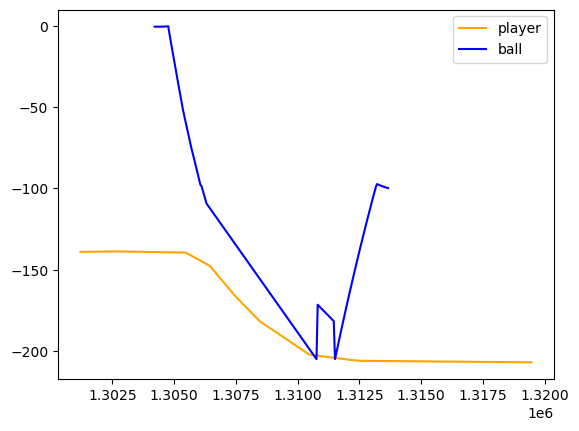

In [58]:
bf_03.clear_plot()
plt.close()

f, ax = plt.subplots()

play_id = 46

thirdbaseman_df = player_pos_03.loc[(player_pos_03["play_id"] == play_id) &
                       (player_pos_03["player_position"] == 7), :]


ball_df = ball_pos_03.loc[(ball_pos_03["play_id"] == play_id)
                       , :]

ax.plot(thirdbaseman_df["timestamp"], thirdbaseman_df["field_x"], color = "orange", label="player") 
ax.plot(ball_df["timestamp"] +3000, ball_df["ball_position_x"], color = "blue", label="ball") 
ax.legend()

f

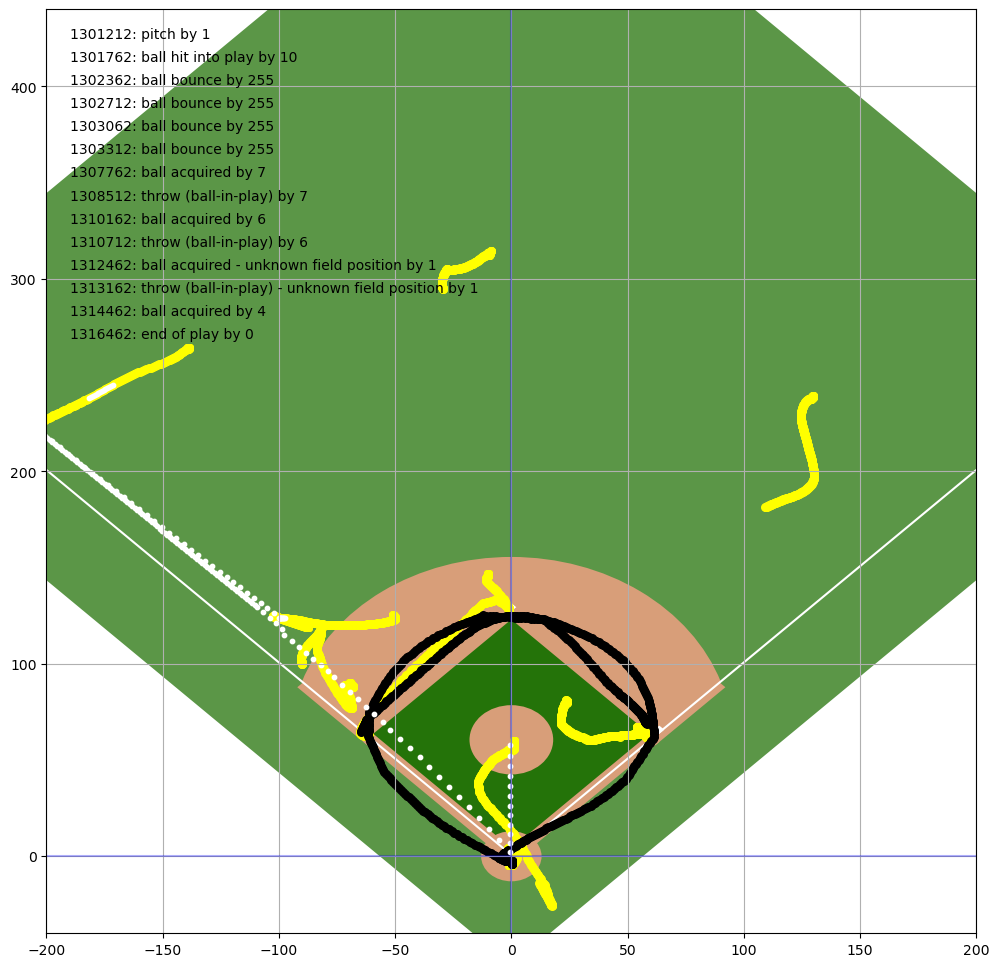

In [51]:
bf_03.clear_plot()

play_id = 46

bf_03.plot_all_components(play_id=play_id)
bf_03.fig

# bf_03.create_gif(play_id=play_id, tag="--debugging, no clue")

## See a play that works, before I go messing with things

1903_23_TeamNA_TeamA1_play148--steal, not picked

In [ ]:
bf_23 = Baseball_Field("1903_23_TeamNA_TeamA1")

In [ ]:
game_events_23 = bf_23.game_obj.game_events_df.copy()
game_info_23 = bf_23.game_obj.game_info_df.copy()
player_pos_23 = bf_23.game_obj.new_player_pos.copy()
ball_pos_23 = bf_23.game_obj.ball_pos_df.copy()

game_events_23.head(5)

In [ ]:
bf_23.clear_plot()
plt.close()

f, ax = plt.subplots()

play_id = 148

thirdbaseman_df = player_pos_23.loc[(player_pos_23["play_id"] == play_id) &
                       (player_pos_23["player_position"] == 2), :]


ball_df = ball_pos_23.loc[(ball_pos_23["play_id"] == play_id)
                       , :]

ax.plot(thirdbaseman_df["timestamp"], thirdbaseman_df["field_x"], color = "orange", label="player") 
ax.plot(ball_df["timestamp"], ball_df["ball_position_x"], color = "blue", label="ball") 
ax.legend()

f

In [ ]:
check_positions_when_acquired(game_events_23, ball_pos_23, player_pos_23)

In [ ]:
plt.close()

In [ ]:
game_events_23[game_events_23["event"] == "throw (ball-in-play)"]

In [ ]:
## make some gifs to see if I need to time correct?

bf_23.clear_plot()

play_id = 196

# bf_23.plot_all_components(play_id=play_id)
# bf_23.fig

# bf_23.create_gif(play_id=play_id, tag="--debugging")

## See how many I would like to line up
to see if it is worth writing that function to line things up
- there are 7 of the games that aren't erroring, so I think I should do this

In [4]:
all_games = get_all_game_strs()

Gathered a list of 97 games


In [5]:
for which_game in all_games:
    if which_game in ["1902_19_TeamME_TeamA2", "1902_13_TeamMD_TeamA2", "1902_03_TeamMG_TeamA3", "1901_13_TeamLL_TeamB",
                     "1902_18_TeamMB_TeamA1", "1900_02_TeamKJ_TeamB", "1901_06_TeamLI_TeamA3", "1902_27_TeamMH_TeamA3",
                     "1902_13_TeamMK_TeamB", "1903_27_TeamNH_TeamA3", "1902_07_TeamMJ_TeamB", "1902_20_TeamME_TeamA2",
                     "1902_30_TeamMF_TeamA2", "1901_05_TeamLI_TeamA3", "1901_17_TeamLH_TeamA3", "1902_21_TeamME_TeamA2",
                     ""]:
        continue
    
    print("Which game: {}".format(which_game))
    
    g = Game(which_game)


Which game: 1903_01_TeamNE_TeamA2
Distance between ball and player is large on average, should maybe clean up 12.199183415462679
Which game: 1903_16_TeamNI_TeamA3
Which game: 1902_02_TeamMG_TeamA3
Which game: 1903_08_TeamNJ_TeamB
Which game: 1900_08_TeamKL_TeamB
Which game: 1903_23_TeamNA_TeamA1
Which game: 1901_08_TeamLK_TeamB
Which game: 1902_22_TeamMA_TeamA1
Which game: 1902_12_TeamMI_TeamA3
Which game: 1903_11_TeamNC_TeamA1
Which game: 1900_07_TeamKL_TeamB


/Users/mattnicholson/Documents/RandomProjects/smt-data-challenge/src/game.py:815: RuntimeWarning: invalid value encountered in cast
  running_outs_seq[(running_index): (running_index + outs_seq.shape[0]), :] = outs_seq


Which game: 1903_17_TeamNI_TeamA3


/Users/mattnicholson/Documents/RandomProjects/smt-data-challenge/src/game.py:815: RuntimeWarning: invalid value encountered in cast
  running_outs_seq[(running_index): (running_index + outs_seq.shape[0]), :] = outs_seq


Which game: 1903_27_TeamNK_TeamB
Which game: 1901_12_TeamLJ_TeamB
Which game: 1900_09_TeamKK_TeamB
Which game: 1901_01_TeamLG_TeamA3
Which game: 1900_03_TeamKJ_TeamB
Distance between ball and player is large on average, should maybe clean up 6.403561421830762
Which game: 1903_22_TeamNA_TeamA1
Which game: 1902_16_TeamMD_TeamA2


/Users/mattnicholson/Documents/RandomProjects/smt-data-challenge/src/game.py:815: RuntimeWarning: invalid value encountered in cast
  running_outs_seq[(running_index): (running_index + outs_seq.shape[0]), :] = outs_seq
/Users/mattnicholson/Documents/RandomProjects/smt-data-challenge/src/game.py:815: RuntimeWarning: invalid value encountered in cast
  running_outs_seq[(running_index): (running_index + outs_seq.shape[0]), :] = outs_seq


Which game: 1903_32_TeamNB_TeamA1
Which game: 1901_07_TeamLK_TeamB
Which game: 1902_23_TeamMA_TeamA1
Which game: 1902_15_TeamMK_TeamB
Which game: 1902_04_TeamML_TeamB
Which game: 1903_24_TeamNA_TeamA1
Which game: 1903_03_TeamNE_TeamA2
Which game: 1903_12_TeamNC_TeamA1
Which game: 1903_09_TeamNJ_TeamB
Distance between ball and player is large on average, should maybe clean up 12.947763118481664


/Users/mattnicholson/Documents/RandomProjects/smt-data-challenge/src/game.py:815: RuntimeWarning: invalid value encountered in cast
  running_outs_seq[(running_index): (running_index + outs_seq.shape[0]), :] = outs_seq


Which game: 1903_19_TeamNL_TeamB
Which game: 1901_02_TeamLG_TeamA3
Which game: 1903_31_TeamNB_TeamA1


/Users/mattnicholson/Documents/RandomProjects/smt-data-challenge/src/game.py:815: RuntimeWarning: invalid value encountered in cast
  running_outs_seq[(running_index): (running_index + outs_seq.shape[0]), :] = outs_seq


Which game: 1901_09_TeamLK_TeamB
Which game: 1902_10_TeamMI_TeamA3


/Users/mattnicholson/Documents/RandomProjects/smt-data-challenge/src/game.py:815: RuntimeWarning: invalid value encountered in cast
  running_outs_seq[(running_index): (running_index + outs_seq.shape[0]), :] = outs_seq


Which game: 1903_02_TeamNE_TeamA2


/Users/mattnicholson/Documents/RandomProjects/smt-data-challenge/src/game.py:815: RuntimeWarning: invalid value encountered in cast
  running_outs_seq[(running_index): (running_index + outs_seq.shape[0]), :] = outs_seq


Which game: 1902_26_TeamMC_TeamA1
Which game: 1903_26_TeamNK_TeamB
Which game: 1902_24_TeamMA_TeamA1
Which game: 1902_01_TeamMG_TeamA3
Which game: 1901_18_TeamLH_TeamA3
Which game: 1901_03_TeamLG_TeamA3
Which game: 1900_06_TeamKL_TeamB
Which game: 1902_14_TeamMK_TeamB
Which game: 1902_05_TeamML_TeamB
Which game: 1902_14_TeamMD_TeamA2


/Users/mattnicholson/Documents/RandomProjects/smt-data-challenge/src/game.py:815: RuntimeWarning: invalid value encountered in cast
  running_outs_seq[(running_index): (running_index + outs_seq.shape[0]), :] = outs_seq


Which game: 1903_30_TeamNB_TeamA1
Which game: 1902_11_TeamMI_TeamA3
Which game: 1903_05_TeamND_TeamA2
Distance between ball and player is large on average, should maybe clean up 14.67974023000007
Which game: 1903_26_TeamNH_TeamA3
Which game: 1903_15_TeamNG_TeamA3


/Users/mattnicholson/Documents/RandomProjects/smt-data-challenge/src/game.py:815: RuntimeWarning: invalid value encountered in cast
  running_outs_seq[(running_index): (running_index + outs_seq.shape[0]), :] = outs_seq
/Users/mattnicholson/Documents/RandomProjects/smt-data-challenge/src/game.py:815: RuntimeWarning: invalid value encountered in cast
  running_outs_seq[(running_index): (running_index + outs_seq.shape[0]), :] = outs_seq


Which game: 1900_04_TeamKK_TeamB
Which game: 1903_20_TeamNL_TeamB
Which game: 1902_06_TeamML_TeamB
Which game: 1903_18_TeamNI_TeamA3
Which game: 1902_09_TeamMJ_TeamB
Which game: 1901_14_TeamLL_TeamB
Which game: 1900_01_TeamKJ_TeamB
Which game: 1902_26_TeamMH_TeamA3
Which game: 1901_10_TeamLJ_TeamB
Which game: 1903_25_TeamNK_TeamB
Which game: 1903_14_TeamNG_TeamA3


/Users/mattnicholson/Documents/RandomProjects/smt-data-challenge/src/game.py:815: RuntimeWarning: invalid value encountered in cast
  running_outs_seq[(running_index): (running_index + outs_seq.shape[0]), :] = outs_seq
/Users/mattnicholson/Documents/RandomProjects/smt-data-challenge/src/game.py:815: RuntimeWarning: invalid value encountered in cast
  running_outs_seq[(running_index): (running_index + outs_seq.shape[0]), :] = outs_seq
/Users/mattnicholson/Documents/RandomProjects/smt-data-challenge/src/game.py:815: RuntimeWarning: invalid value encountered in cast
  running_outs_seq[(running_index): (running_index + outs_seq.shape[0]), :] = outs_seq
/Users/mattnicholson/Documents/RandomProjects/smt-data-challenge/src/game.py:815: RuntimeWarning: invalid value encountered in cast
  running_outs_seq[(running_index): (running_index + outs_seq.shape[0]), :] = outs_seq
/Users/mattnicholson/Documents/RandomProjects/smt-data-challenge/src/game.py:815: RuntimeWarning: invalid value encountered 

Which game: 1902_29_TeamMF_TeamA2


/Users/mattnicholson/Documents/RandomProjects/smt-data-challenge/src/game.py:815: RuntimeWarning: invalid value encountered in cast
  running_outs_seq[(running_index): (running_index + outs_seq.shape[0]), :] = outs_seq


Which game: 1902_28_TeamMC_TeamA1
Which game: 1901_04_TeamLI_TeamA3
Which game: 1903_28_TeamNF_TeamA2
Which game: 1901_16_TeamLH_TeamA3
Which game: 1902_25_TeamMH_TeamA3
Which game: 1900_05_TeamKK_TeamB
Distance between ball and player is large on average, should maybe clean up 6.6387674989651195
Which game: 1903_07_TeamND_TeamA2
Which game: 1903_04_TeamNC_TeamA1


/Users/mattnicholson/Documents/RandomProjects/smt-data-challenge/src/game.py:815: RuntimeWarning: invalid value encountered in cast
  running_outs_seq[(running_index): (running_index + outs_seq.shape[0]), :] = outs_seq
/Users/mattnicholson/Documents/RandomProjects/smt-data-challenge/src/game.py:815: RuntimeWarning: invalid value encountered in cast
  running_outs_seq[(running_index): (running_index + outs_seq.shape[0]), :] = outs_seq


Which game: 1902_17_TeamMB_TeamA1
Which game: 1902_08_TeamMJ_TeamB
Which game: 1903_10_TeamNJ_TeamB
Which game: 1903_29_TeamNF_TeamA2
Which game: 1901_15_TeamLL_TeamB
Distance between ball and player is large on average, should maybe clean up 5.3524560073690175
Which game: 1903_13_TeamNG_TeamA3
Which game: 1903_21_TeamNL_TeamB
Which game: 1903_30_TeamNF_TeamA2
Which game: 1903_06_TeamND_TeamA2
Distance between ball and player is large on average, should maybe clean up 15.614163808346984
Which game: 1903_25_TeamNH_TeamA3


/Users/mattnicholson/Documents/RandomProjects/smt-data-challenge/src/game.py:815: RuntimeWarning: invalid value encountered in cast
  running_outs_seq[(running_index): (running_index + outs_seq.shape[0]), :] = outs_seq


Which game: 1901_11_TeamLJ_TeamB
Which game: 1902_31_TeamMF_TeamA2
